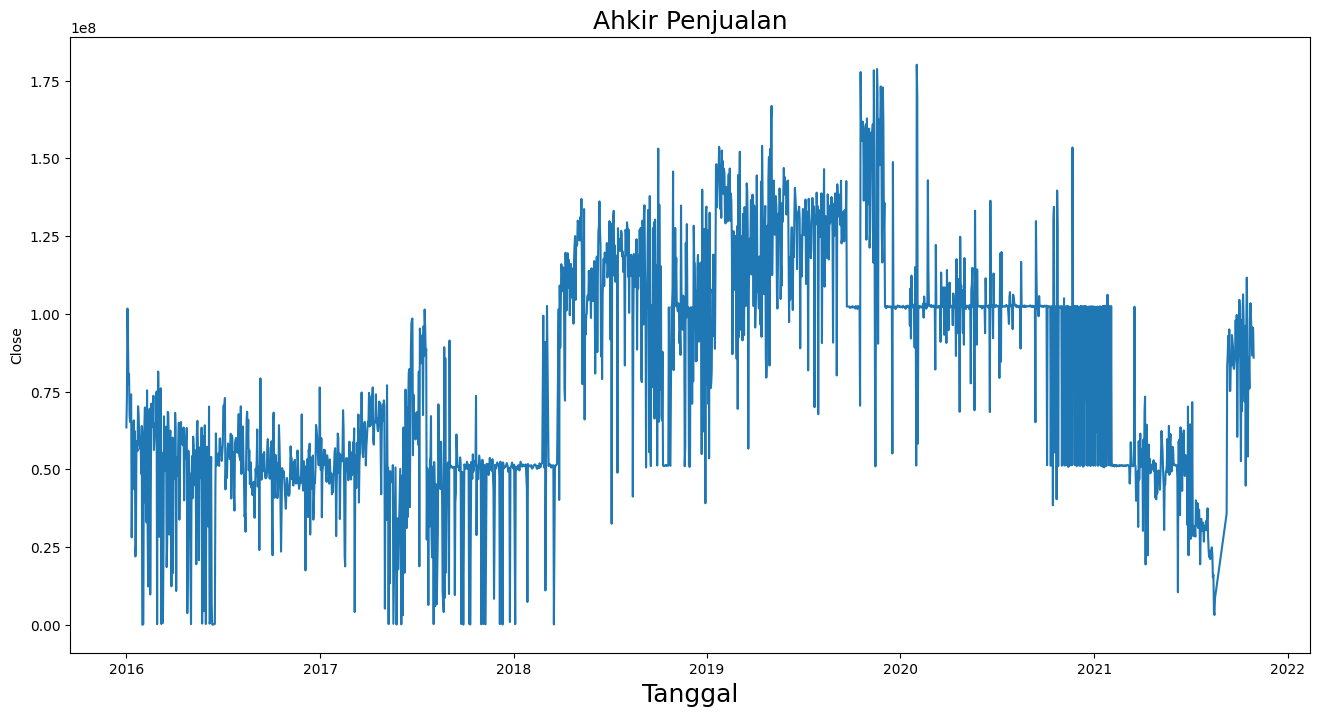

,Tanggal,qty,Jumlah
2016-01-01,2016-01-01,8694,63467076.0
2016-01-02,2016-01-02,10044,73320032.0
2016-01-03,2016-01-03,13928,101671188.0
2016-01-04,2016-01-04,12518,91382972.0
2016-01-05,2016-01-05,11112,77424375.0
...,...,...,...
2021-10-25,2021-10-25,12239,93628350.0
2021-10-26,2021-10-26,11319,86590350.0
2021-10-27,2021-10-27,12502,95640300.0
2021-10-28,2021-10-28,12456,95288400.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('Gasoline.csv')
df = df.set_index(pd.DatetimeIndex(df['Tanggal'].values))

plt.figure(figsize=(16, 8))
plt.title('Ahkir Penjualan', fontsize=18)
plt.plot(df['Jumlah'])
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Close')
plt.show()

df

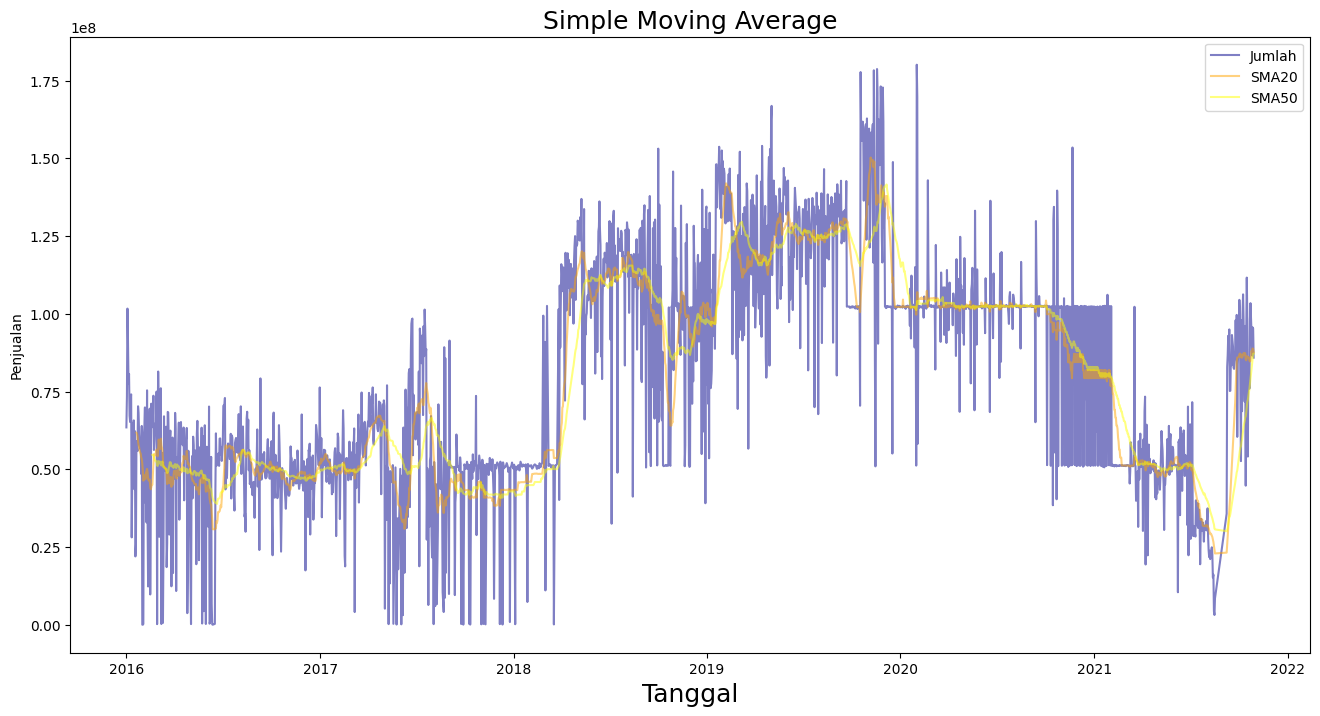

In [2]:
# Function Untuk Simple Moving Average
def SMA(data, period=30, column='Jumlah'):
    return data[column].rolling(window=period).mean()

df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

# Menampilkan Hasil
plt.figure(figsize=(16, 8))
plt.title('Simple Moving Average', fontsize=18)
plt.plot(df['Jumlah'], alpha=0.5, label='Jumlah',color='darkblue')
plt.plot(df['SMA20'], alpha=0.5, label='SMA20',color='orange')
plt.plot(df['SMA50'],alpha = 0.5, label='SMA50', color='yellow')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Penjualan')
plt.legend()
plt.show()



In [8]:
window=35
window2=50

In [9]:
df['EMA50'] = df['Jumlah'].rolling(window).mean()

df['EMA20'] = df['Jumlah'].ewm(span=window, adjust=False).mean()
df['EMA50'] = df['Jumlah'].ewm(span=window2, adjust=False).mean()

df.dropna(inplace=True)

# Evaluation Metrics
target_column = 'Jumlah'
prediction_column = 'SMA20'

rmse_s20 = np.sqrt(mean_squared_error(df['Jumlah'], df['SMA20']))
rmse_s50 = np.sqrt(mean_squared_error(df['Jumlah'], df['SMA50']))
rmse_e20 = np.sqrt(mean_squared_error(df['Jumlah'], df['EMA20']))
rmse_e50 = np.sqrt(mean_squared_error(df['Jumlah'], df['SMA50']))

mae_s20 = mean_absolute_error(df['Jumlah'], df['SMA20'])
mae_s50 = mean_absolute_error(df['Jumlah'], df['SMA50'])
mae_e20 = mean_absolute_error(df['Jumlah'], df['EMA20'])
mae_e50 = mean_absolute_error(df['Jumlah'], df['EMA50'])

mape_s20 = np.mean(np.abs((df['Jumlah'] - df['SMA20']) / df['SMA20'])) * 100
mape_s50 = np.mean(np.abs((df['Jumlah'] - df['SMA50']) / df['SMA50'])) * 100
mape_e20 = np.mean(np.abs((df['Jumlah'] - df['SMA20']) / df['SMA20'])) * 100
mape_e50 = np.mean(np.abs((df['Jumlah'] - df['SMA50']) / df['SMA50'])) * 100

In [10]:
print(f'RMSE SMA 20: {rmse_s20}')
print(f'MAE SMA 20: {mae_s20}')
print(f'MAPE SMA 20: {mape_s20}%')
print("\n")
print(f'RMSE SMA 50: {rmse_s50}')
print(f'MAE SMA 50: {mae_s50}')
print(f'MAPE SMA 50: {mape_s50}%')
print("\n")
print(f'RMSE EMA 20: {rmse_e20}')
print(f'MAE EMA 20: {mae_e20}')
print(f'MAPE EMA 20: {mape_e20}%')
print("\n")
print(f'RMSE EMA 50: {rmse_e50}')
print(f'MAE EMA 50: {mae_e50}')
print(f'MAPE EMA 50: {mape_e50}%')

RMSE SMA 20: 18564822.269850973
MAE SMA 20: 12672821.876090303
MAPE SMA 20: 18.334878748588817%


RMSE SMA 50: 20695165.291810166
MAE SMA 50: 14789537.842893794
MAPE SMA 50: 21.05796294766963%


RMSE EMA 20: 18473542.23102989
MAE EMA 20: 12901431.64148767
MAPE EMA 20: 18.334878748588817%


RMSE EMA 50: 20695165.291810166
MAE EMA 50: 13669096.07215251
MAPE EMA 50: 21.05796294766963%


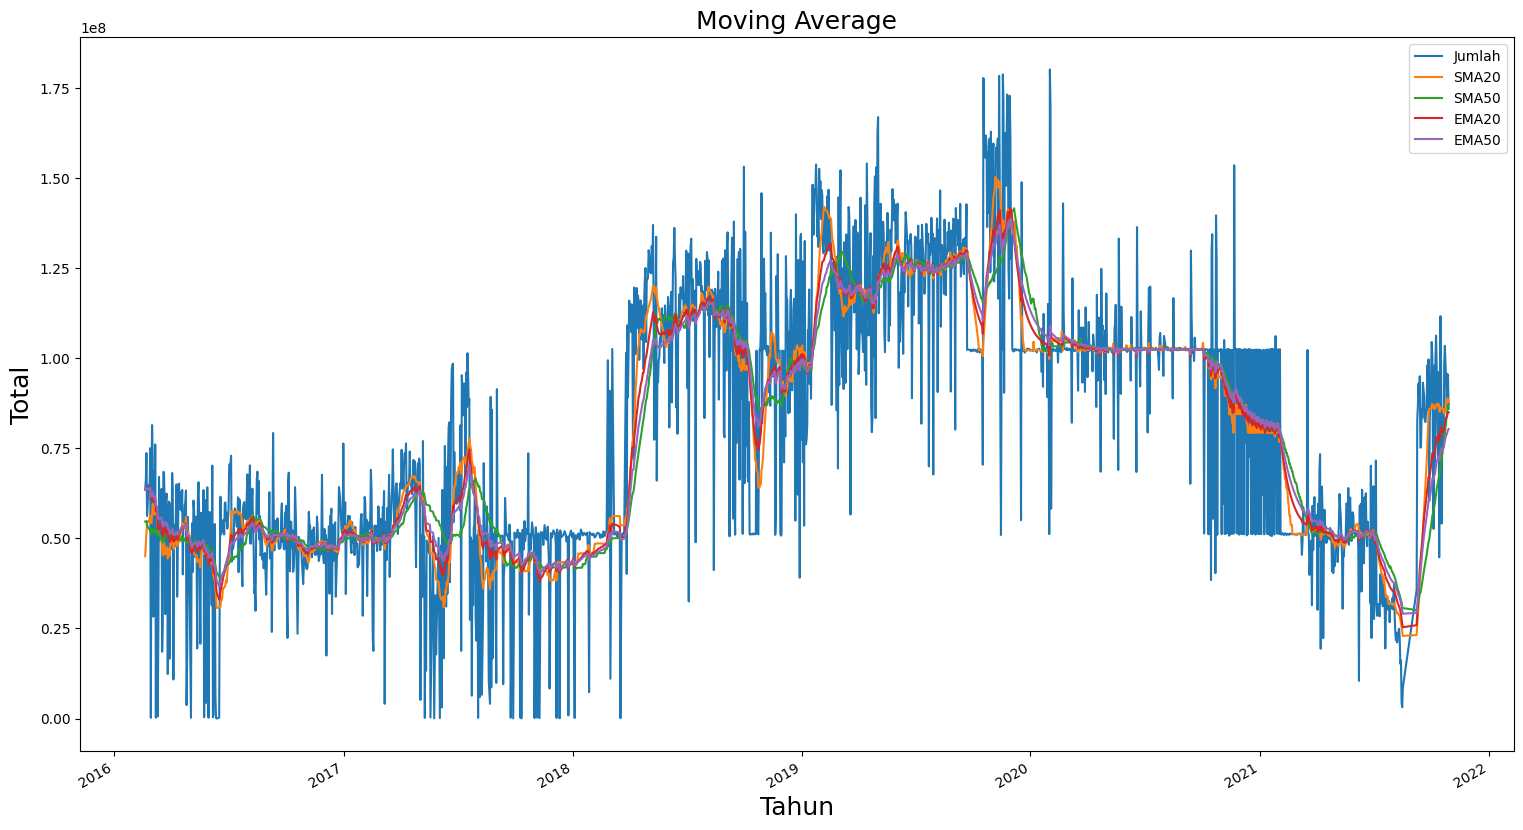

In [11]:


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
df[['Jumlah', 'SMA20', 'SMA50', 'EMA20', 'EMA50']].plot(ax=ax)

plt.title('Moving Average',fontsize=18)
plt.xlabel('Tahun',fontsize=18)
plt.ylabel('Total',fontsize=18)
plt.show()